In [34]:
#qn 1a
import numpy as np

csv = 'https://www.dropbox.com/s/oqoyy9p849ewzt2/linear.csv?dl=1'
data = np.genfromtxt(csv,delimiter =',')
X = data[:,1:]
Y = data[:,0]
   
vX = X[:10,:]
tX = X[10:,:]
vY = Y[:10]
tY = Y[10:]

print ('Shape of vX:', vX.shape)
print ('Shape of tX:', tX.shape)
print ('Shape of vY:', vY.shape)
print ('Shape of tY:', tY.shape)

Shape of vX: (10, 4)
Shape of tX: (40, 4)
Shape of vY: (10,)
Shape of tY: (40,)


In [5]:
# Qn 1b
import theano
import theano.tensor as T

n = X.shape[0]
d = X.shape[1]
learn_rate = 0.5
x = T.matrix(name = 'x') #feature matrix
y = T.vector(name = 'y')
w = theano.shared(np.zeros((d,1)),name = 'w')

reg_penalty = 0.15
reg_loss = T.sum((T.dot(x,w).T - y)**2)/2/n + reg_penalty*(w[0,0]**2 + w[1,0]**2 + w[2,0]**2)/2
grad_risk = T.grad(reg_loss, wrt=w)

train_model = theano.function(inputs=[],
                            outputs=reg_loss,
                            updates=[(w,w-learn_rate*grad_risk)],
                            givens={x:tX, y:tY})
#Execupte the gradient descent algoorithm
n_steps=50
for i in range(n_steps):
    train_model()
print(w.get_value())

[[-0.52706566]
 [ 1.16683314]
 [ 0.04560471]
 [-1.84895354]]


In [11]:
#Qn 1c
from scipy.optimize import fmin_l_bfgs_b as minimize

csv = 'https://www.dropbox.com/s/oqoyy9p849ewzt2/linear.csv?dl=1'
data = np.genfromtxt(csv,delimiter =',')

def costgrad(w, *args):
    penalty = 0.15
    x = args[0]
    y = args[1]
    n = x.shape[0]
    cost = np.sum((np.dot(x,w).T-y)**2)/2/n + penalty*(w[0]**2 + w[1]**2 + w[2]**2)/2
    a = np.asarray([w[0], w[1],w[2],0])
    grad = penalty*(a) + np.dot(np.dot(x.T,x),w)/n- np.dot(x.T,y)/n
    return cost, grad

x = data[:,1:]
d = x.shape[1]
w = np.zeros((d,1))
y = data[:,0]

optx,cost,messages = minimize(costgrad,w,args=(x,y), factr = 10, pgtol = 1e-10)
print (optx)
print(cost)

[-0.51575135  1.18644932  0.03302971 -1.86038231]
0.14782238561001965


In [14]:
#qn 1d
def ridge_regression(tX, tY, l):
    n = tX.shape[0]
    A = np.eye(4)
    A[3,3] = 0
    b = np.dot(np.dot(np.linalg.inv(n*l*A + np.dot(tX.T,tX)),tX.T),tY)
    return b

print (ridge_regression(X,Y,0.15))

[-0.51575135  1.18644932  0.03302971 -1.86038231]


[-0.57006903  1.3753366   0.02830073 -1.88456156]


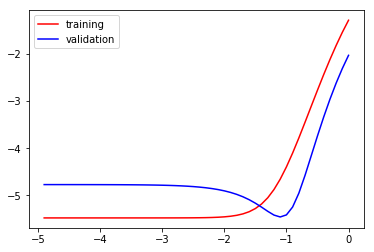

The optimal lambda value is: 0.07943282347242814 or 10^(-1.1)


In [16]:
#Qn 1e
import matplotlib.pyplot as plt
%matplotlib inline

tn = tX.shape[0]
vn = vX.shape[0]
tloss = []
vloss = []
index = -np.arange(0,5,0.1)
for i in index:
    w = ridge_regression(tX,tY,10**i)
    tloss = tloss+[np.sum((np.dot(tX,w)-tY)**2)/tn/2]
    vloss = vloss+[np.sum((np.dot(vX,w)-vY)**2)/vn/2]

print(w)
plt.plot(index,np.log(tloss),'r',label = 'training')
plt.plot(index,np.log(vloss),'b',label = 'validation')
plt.legend(loc='upper left')
plt.show()
#lambda that minimizes validation loss is 0.1
print ('The optimal lambda value is:', pow(10,index[np.asarray(vloss).argmin()]), 'or 10^('+str(index[np.asarray(vloss).argmin()])+')')

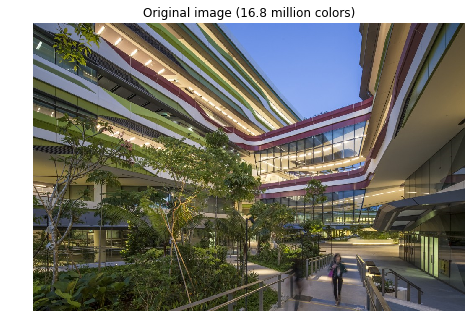

In [19]:
#Qn 2

import numpy.random as rng
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

n_colors = 32
pic = 'https://www.dropbox.com/s/bmwwfct2qxjfje4/sutd.png?dl=1'
img = mpimg.imread(pic)
img = img[:,:,:3]
w, h, d = tuple(img.shape)
image_array = np.reshape(img, (w * h, d))

def recreate_image(palette, labels, w, h):
    d = palette.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = palette[labels[label_idx]]
            label_idx += 1
    return image

#Original Image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (16.8 million colors)')
plt.imshow(img)
plt.show()

[25 30 30 ...  9  9  9]


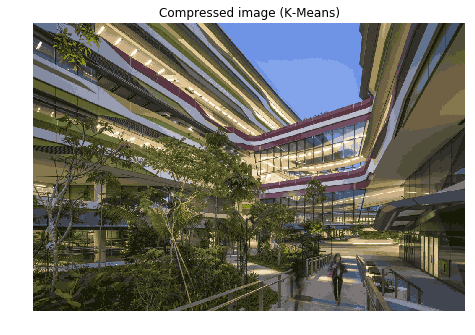

In [22]:
#Qn 2a
sample = image_array[rng.randint(w * h, size=1000)] #1000 Random pixel samples
model = KMeans(n_clusters=n_colors, random_state = 0).fit(sample)#partition the colors of these pixels into 32 clusters
kmeans_palette = model.cluster_centers_ #Colour Palette extract cluster centers
kmeans_labels = model.predict(image_array)

print(kmeans_labels)
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Compressed image (K-Means)')
plt.imshow(recreate_image(kmeans_palette, kmeans_labels, w, h))
plt.show()

Predicting color indices on the full image (random)
[31 12 12 ... 23 23 23]


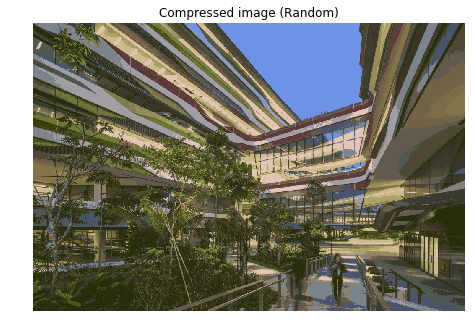

In [23]:
#Qn 2b

from sklearn.metrics import pairwise_distances_argmin
random_palette = image_array[rng.randint(w * h,size=n_colors)] #32 Random pixel samples for palette
print('Predicting color indices on the full image (random)')
random_labels = pairwise_distances_argmin(image_array,random_palette)
print(random_labels)
plt.figure(3)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Compressed image (Random)')
plt.imshow(recreate_image(random_palette, random_labels, w, h))
plt.show()

#2c) To find z that minimizes centroid
\begin{align*}
\frac{\partial}{\partial z} & \sum_{i=1}^m ||x^i - z||^2 = 0 \\\\
-2\sum_{i=1}^m ||x^i - z||^2 = 0\\\\
\sum_{i=1}^m x^i - \sum_{i=1}^m z = 0\\\\
\sum_{i=1}^m x^i - mz = 0\\\\
z = \frac{1}{m} \sum_{i=1}^m x^i\\\\
\\\\
\end{align*}

#2c) To find z that minimizes centroid
\begin{align*}
\frac{\partial}{\partial z} & \sum_{i=1}^m ||x^i - z||^2 = 0 \\\\
-2\sum_{i=1}^m ||x^i - z||^2 = 0\\\\
\sum_{i=1}^m x^i - \sum_{i=1}^m z = 0\\\\
\sum_{i=1}^m x^i - mz = 0\\\\
z = \frac{1}{m} \sum_{i=1}^m x^i\\\\
\\\\
\end{align*}

In [25]:
import pandas as pd
from IPython.display import display

X_data = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')
X_valid = X_data.sample(frac=0.2,random_state=200)
X_train = X_data.drop(X_valid.index)
Y_data = X_data["Survived"]
Y_valid = X_valid["Survived"]
Y_train = X_train["Survived"]
ID_test = X_test["PassengerId"]

display(X_data.head())
display(X_data.describe())
display(X_test.head())
display(X_test.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [27]:
def preprocess(df):
    df.drop(["Survived"],axis=1,inplace=True,errors="ignore")
    df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

    df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)
    df["Fare"].fillna(df["Fare"].median(),inplace=True)
    df["Age"].fillna(df["Age"].mean(),inplace=True)

    df = df.join(pd.get_dummies(df["Embarked"]))
    df.drop(["Embarked"],axis=1,inplace=True)
    df = df.join(pd.get_dummies(df["Sex"]))
    df.drop(["Sex"],axis=1,inplace=True)
    df = df.join(pd.get_dummies(df["Pclass"]))
    df.drop(["Pclass"],axis=1,inplace=True)

    df.loc[df.SibSp > 0 ,"Family"] = 1
    df.loc[df.Age < 16, "Child"] = 1

    df["Family"].fillna(0,inplace=True)
    df["Child"].fillna(0,inplace=True)
    
    return df

X_train = preprocess(X_train)
X_valid = preprocess(X_valid)
X_data = preprocess(X_data)
X_test = preprocess(X_test)
display(X_train.head())

,Age,SibSp,Parch,Fare,C,Q,S,female,male,1,2,3,Family,Child
0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1,1.0,0.0
2,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1,0.0,0.0
3,35.000000,1,0,53.1000,0,0,1,1,0,1,0,0,1.0,0.0
4,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1,0.0,0.0
5,29.449243,0,0,8.4583,0,1,0,0,1,0,0,1,0.0,0.0


In [28]:
# Qn 3b
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,Y_train)
print("Model score:",model.score(X_valid,Y_valid))

Model score: 0.7808988764044944


In [29]:
# Qn 3c
logreg = LogisticRegression()
logreg.fit(X_data,Y_data)
print("Model parameters:", logreg.coef_)
print("Intercept value:", logreg.intercept_)



Model parameters: [[-0.02377991 -0.78116275 -0.18699146  0.00343958  0.21672411  0.29677403
  -0.11488862  1.51420051 -1.11559099  1.03356903  0.21482533 -0.84978484
   0.85645439  1.25372065]]
Intercept value: [0.39860952]


In [30]:
#Qn 3c

coeff_df = pd.DataFrame(X_data.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimate'] = pd.Series(logreg.coef_[0])
display(coeff_df)

,Features,Coefficient Estimate
0,SibSp,-0.023780
1,Parch,-0.781163
2,Fare,-0.186991
3,C,0.003440
4,Q,0.216724
5,S,0.296774
6,female,-0.114889
7,male,1.514201
8,1,-1.115591
9,2,1.033569


In [32]:
Y_test = logreg.predict(X_test)
ans = pd.DataFrame({"PassengerId":ID_test,"Survived":Y_test})
ans.to_csv("submit.csv", index=False)

In [33]:
print(ans)#0.7790

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         0
22           914         1
23           915         1
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         0
3